2023-11-12

BBME 520

Assignment 9 part B

Javid Jannat

In [1]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib
from matplotlib import pyplot as plt
import sklearn

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:,0] # gives subject age on standard units after z-scoring

data_n = output_variable.size
sets_n = 43

input_variables = [None]*sets_n

for i in range(sets_n):

    if not (i==0): # this saves time as we dont need to load all of the sets
        continue

    atlas_nii = index_img(crad['scorr_mean'], i); #this needs to be modified for some tasks
    masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True);
    input_variables[i] = masker.fit_transform(brain_data.gray_matter_maps);
    print('%i regions found in this atlas' % (len(np.unique(atlas_nii.get_fdata().ravel())) - 1))

C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\input_data\__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\datasets\struct.py:850: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\datasets\atlas.py:269: FutureWarning: The default behavior of the function will be deprecated and replaced in release 0.13 to use the new parameters homogeneity and grp_mean.
  warnings.warn(


10 regions found in this atlas


C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


In [2]:
import sklearn
from sklearn import neural_network
from sklearn import calibration

p_trainer_maker = sklearn.neural_network.MLPRegressor

In [3]:
# task 6
layer_list = [tuple([10]*(i+1)) for i in range(5)]
alpha_list = [0.0001 , 0.001 , 0.01 , 0.1 , 1.0]

out = output_variable
inp = input_variables[0]

NINETY = int(out.size*0.9)
linspace = np.arange(out.size)
train = linspace < NINETY
test = linspace >= NINETY

outsamp_accuracies = np.zeros((5,5))
insamp_accuracies = np.zeros((5,5))

for i,layers in enumerate(layer_list):
    for j,alpha in enumerate(alpha_list):
        model = p_trainer_maker(hidden_layer_sizes=layers, activation='relu', alpha=alpha, max_iter= 2000).fit(inp[train],out[train])
        outsamp_accuracies[i,j] = model.score(inp[test],out[test])
        insamp_accuracies[i,j] = model.score(inp[train],out[train])


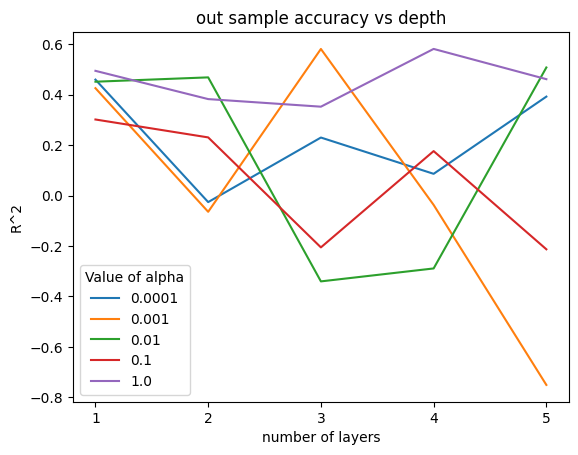

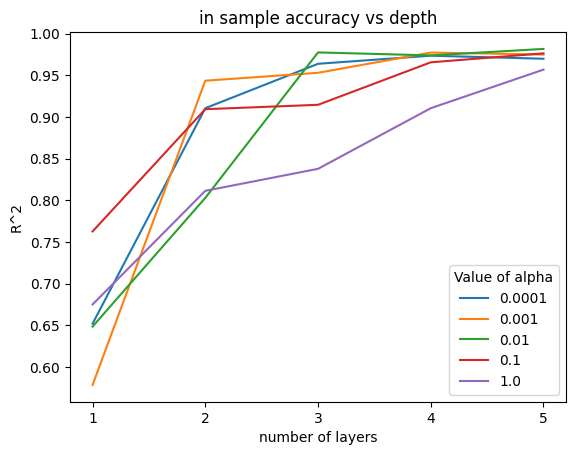

In [4]:
plt.plot(outsamp_accuracies)
plt.legend(alpha_list,title='Value of alpha');
plt.xticks(np.arange(5),np.arange(5)+1);
plt.ylabel('R^2');
plt.xlabel('number of layers')
plt.title('')
plt.title('out sample accuracy vs depth')
plt.show()

plt.plot(insamp_accuracies)
plt.legend(alpha_list,title='Value of alpha');
plt.xticks(np.arange(5),np.arange(5)+1);
plt.ylabel('R^2');
plt.xlabel('number of layers')

plt.title('in sample accuracy vs depth')
plt.show()

In [5]:
# task 7
layer_list = [5,10,25,50,100]
alpha_list = [0.0001 , 0.001 , 0.01 , 0.1 , 1.0]

out = output_variable
inp = input_variables[0]

NINETY = int(out.size*0.9)
linspace = np.arange(out.size)
train = linspace < NINETY
test = linspace >= NINETY

outsamp_accuracies = np.zeros((5,5))
insamp_accuracies = np.zeros((5,5))

for i,layers in enumerate(layer_list):
    for j,alpha in enumerate(alpha_list):
        model = p_trainer_maker(hidden_layer_sizes=layers, activation='relu', alpha=alpha, max_iter= 2000).fit(inp[train],out[train])
        outsamp_accuracies[i,j] = model.score(inp[test],out[test])
        insamp_accuracies[i,j] = model.score(inp[train],out[train])

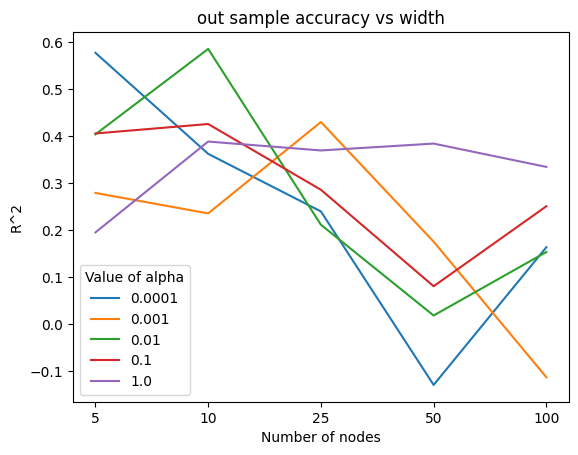

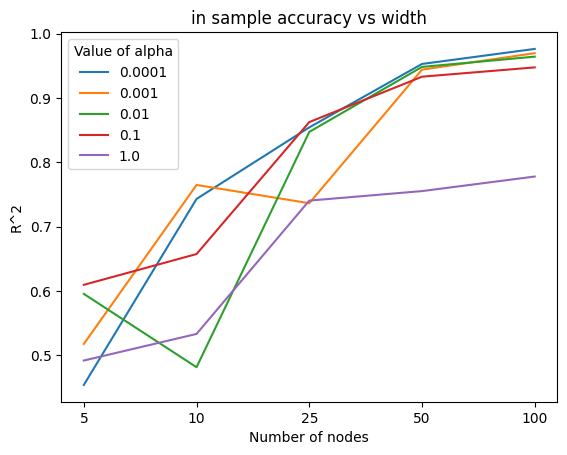

In [6]:
plt.plot(outsamp_accuracies)
plt.legend(alpha_list,title='Value of alpha');
plt.xticks(np.arange(5),layer_list)
plt.ylabel('R^2');
plt.xlabel('Number of nodes')

plt.title('')
plt.title('out sample accuracy vs width')
plt.show()

plt.plot(insamp_accuracies)
plt.legend(alpha_list,title='Value of alpha');
plt.xticks(np.arange(5),layer_list)
plt.ylabel('R^2');
plt.xlabel('Number of nodes')

plt.title('in sample accuracy vs width')
plt.show()

In [7]:
# task 8
func_list = ['identity', 'logistic', 'tanh', 'relu']
alpha_list = [0.0001 , 0.001 , 0.01 , 0.1 , 1.0]

out = output_variable
inp = input_variables[0]

NINETY = int(out.size*0.9)
linspace = np.arange(out.size)
train = linspace < NINETY
test = linspace >= NINETY

outsamp_accuracies = np.zeros((4,5))
insamp_accuracies = np.zeros((4,5))

for i,func in enumerate(func_list):
    for j,alpha in enumerate(alpha_list):
        model = p_trainer_maker(hidden_layer_sizes=(10,), activation=func, alpha=alpha, max_iter= 2000).fit(inp[train],out[train])
        outsamp_accuracies[i,j] = model.score(inp[test],out[test])
        insamp_accuracies[i,j] = model.score(inp[train],out[train])

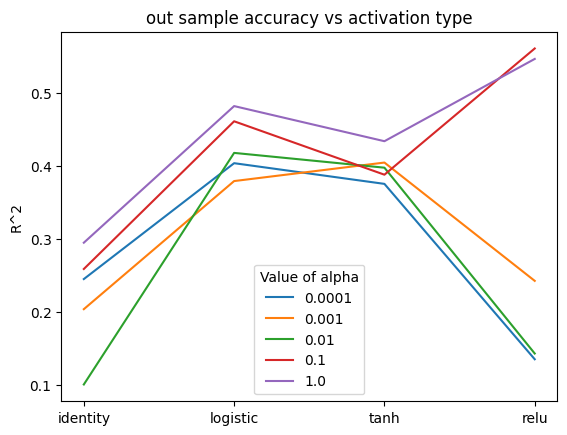

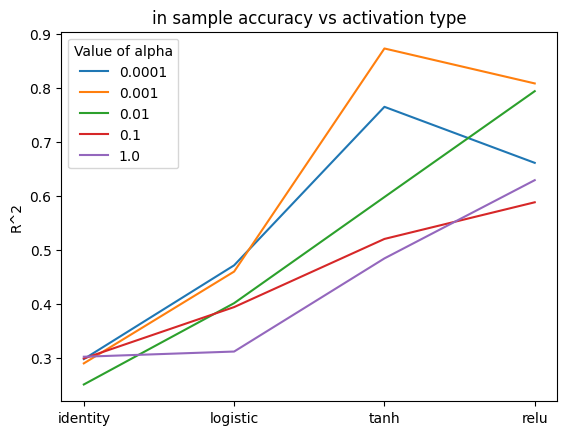

In [8]:
plt.plot(outsamp_accuracies)
plt.legend(alpha_list,title='Value of alpha');
plt.xticks(np.arange(4),func_list);
plt.ylabel('R^2');
plt.title('out sample accuracy vs activation type')
plt.show()

plt.plot(insamp_accuracies)
plt.legend(alpha_list,title='Value of alpha');
plt.xticks(np.arange(4),func_list);
plt.ylabel('R^2');
plt.title('in sample accuracy vs activation type')
plt.show()

In [9]:
# task 9
layer_list = [tuple([10]*(i+1)) for i in range(5)]

out = output_variable
inp = input_variables[0]

NINETY = int(out.size*0.9)
linspace = np.arange(out.size)
train = linspace < NINETY
test = linspace >= NINETY

outsamp_accuracies = np.zeros((5,100))
insamp_accuracies = np.zeros((5,100))

for i,layers in enumerate(layer_list):
    for j in range(100):
        model = p_trainer_maker(hidden_layer_sizes=layers, activation='relu', alpha=0.0001, max_iter= 2000, random_state=j).fit(inp[train],out[train])
        outsamp_accuracies[i,j] = model.score(inp[test],out[test])
        insamp_accuracies[i,j] = model.score(inp[train],out[train])

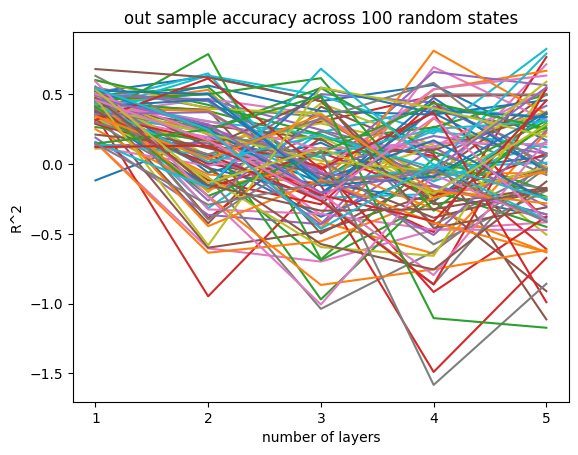

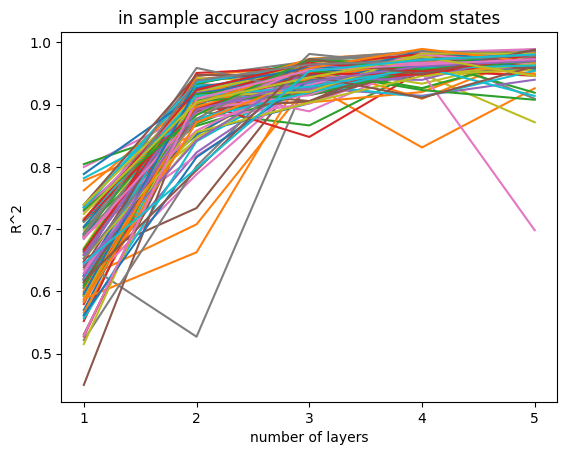

In [10]:
plt.plot(outsamp_accuracies)
plt.xticks(np.arange(5),np.arange(5)+1);
plt.ylabel('R^2');
plt.xlabel('number of layers')

plt.title('out sample accuracy across 100 random states')
plt.show()

plt.plot(insamp_accuracies)
plt.xticks(np.arange(5),np.arange(5)+1);
plt.ylabel('R^2');
plt.xlabel('number of layers')

plt.title('in sample accuracy across 100 random states')
plt.show()

In [11]:
#task 10

func_list = ['identity', 'logistic', 'tanh', 'relu', 'Ridge']
p_trainers = []

for func in func_list:
    if func=='Ridge':
        p_trainers.append(sklearn.linear_model.Ridge(alpha=1.0 , max_iter= 10000))
        continue

    p_trainers.append(p_trainer_maker(hidden_layer_sizes=(10,), activation=func, alpha=0.0001, max_iter= 2000))


predictions = [np.zeros(data_n) for i in range(5)]
splits_n = 10
splitter = sklearn.model_selection.KFold(n_splits=splits_n, shuffle=False)

out = output_variable
inp = input_variables[0]

index_generator = splitter.split(inp,out)

for train,test in index_generator:
    for i,pt in enumerate(p_trainers):

        model= pt.fit(inp[train],out[train])

        predictions[i][test] = model.predict(inp[test])


def mse_calibrator(real,predict, n_bins=5):
    rmax = np.max(real)
    rmin = np.min(real)
    step_size = (rmax-rmin)/n_bins
    
    X_vals = [None]*n_bins
    MSEs = [None]*n_bins

    for k in range(n_bins):
        lower = rmin + k*step_size
        higher = rmin + (k+1)*step_size
        indices = np.logical_and(real>lower, real<=higher)

        r = real[indices]
        p = predict[indices]

        X_vals[k] = (lower+higher)/2
        MSEs[k]= sklearn.metrics.mean_squared_error(r,p)
    
    return (X_vals,MSEs)
    

c_curve = []

for i,p in enumerate(predictions):
    c_curve.append(mse_calibrator(out,p,n_bins=10))

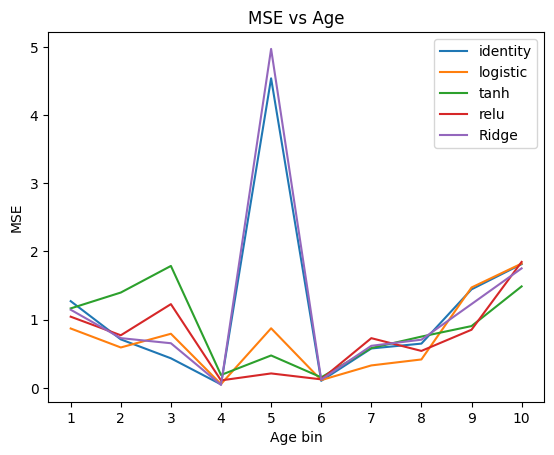

In [14]:
for c in c_curve:
    plt.plot(c[0],c[1])

x=c[0]

plt.title("MSE vs Age")
plt.xticks(x,np.arange(1,11))
plt.legend(func_list)
plt.ylabel('MSE');
plt.xlabel('Age bin');